## Kütüphanelerin Yüklenmesi

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import warnings
warnings.filterwarnings('ignore')

## Veri Setinin İçe Aktarılması

In [2]:
data = pd.read_csv("creditcard_2023.csv")

In [3]:
data

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


## Veri Setinin Analizi

In [4]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
data.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [7]:
data.shape

(568630, 31)

In [8]:
"""
Veri seti 568630 satır(Örneklem) ve 31 sütundan(Öznitelik) oluşmaktadır.
"""

'\nVeri seti 568630 satır(Örneklem) ve 31 sütundan(Öznitelik) oluşmaktadır.\n'

In [9]:
data.dtypes

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [10]:
data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
data.nunique()

id        568630
V1        552035
V2        552035
V3        552035
V4        552035
V5        552035
V6        552035
V7        552035
V8        552035
V9        552035
V10       552035
V11       552035
V12       552035
V13       552035
V14       552035
V15       552035
V16       552035
V17       552035
V18       552035
V19       552035
V20       552035
V21       552035
V22       552035
V23       552035
V24       552035
V25       552035
V26       552035
V27       552035
V28       552035
Amount    506485
Class          2
dtype: int64

In [12]:
data["Class"].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [13]:
data["Class"]

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64

In [14]:
df = data.copy()

In [15]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,568630.0,2.843145e+05,164149.486122,0.000000,142157.250000,284314.500000,426471.750000,568629.000000
V1,568630.0,-5.638058e-17,1.000001,-3.495584,-0.565286,-0.093638,0.832658,2.229046
V2,568630.0,-1.319545e-16,1.000001,-49.966572,-0.486678,-0.135894,0.343555,4.361865
V3,568630.0,-3.518788e-17,1.000001,-3.183760,-0.649299,0.000353,0.628538,14.125834
V4,568630.0,-2.879008e-17,1.000001,-4.951222,-0.656020,-0.073762,0.707005,3.201536
V5,568630.0,7.997245e-18,1.000001,-9.952786,-0.293496,0.081088,0.439737,42.716891
V6,568630.0,-3.958636e-17,1.000001,-21.111108,-0.445871,0.078718,0.497788,26.168402
V7,568630.0,-3.198898e-17,1.000001,-4.351839,-0.283533,0.233366,0.525955,217.873038
V8,568630.0,2.109273e-17,1.000001,-10.756342,-0.192257,-0.114524,0.047299,5.958040
V9,568630.0,3.998623e-17,1.000001,-3.751919,-0.568745,0.092526,0.559262,20.270062


## Veri Setinin Görselleştirilmesi

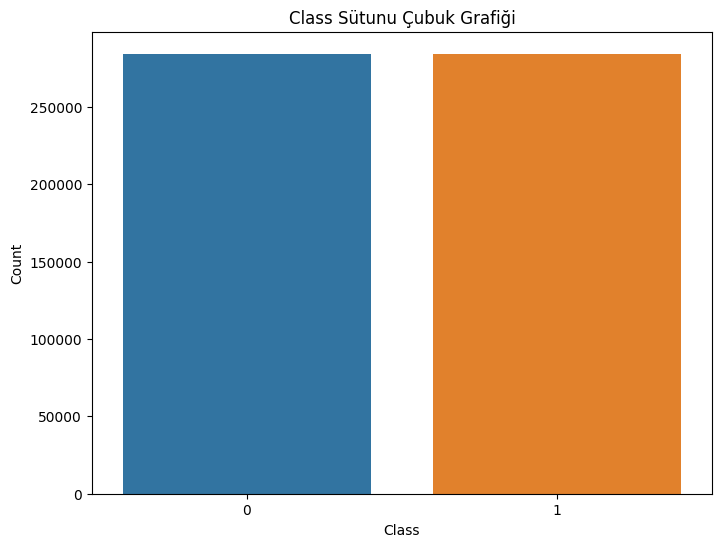

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Sütunu Çubuk Grafiği')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

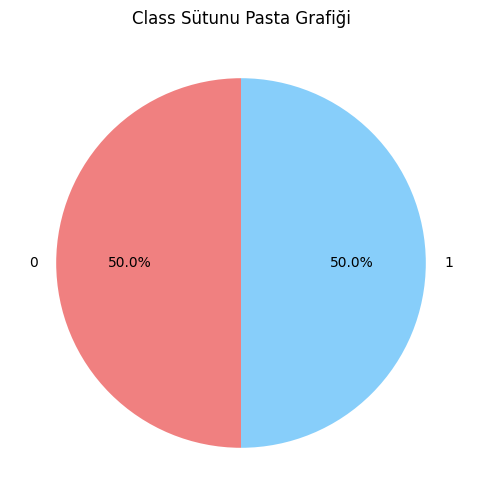

In [18]:
class_counts = df['Class'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Class Sütunu Pasta Grafiği')
plt.show()

In [19]:
df[df["Class"] ==0]

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,284802,-1.605484,2.041786,-1.198693,-1.883651,-1.054493,-1.199907,-0.635763,1.849901,1.948540,...,-0.018546,0.060656,1.062051,-0.863202,2.407534,0.562133,1.024829,1.878089,15599.27,0
284803,284803,-0.080325,-0.463534,1.977771,-1.016889,0.643741,1.046862,0.441402,-0.084550,0.880137,...,-0.018251,0.857735,-0.011161,-1.658129,-1.036511,-0.958793,-0.158577,-0.229647,3614.52,0
284804,284804,1.653848,-0.550318,-0.382720,-0.914126,1.676939,2.007193,0.336910,0.014224,0.773796,...,-0.011261,0.509828,-0.061656,1.377016,0.354133,-0.189053,-0.232734,-0.164373,4366.80,0
284805,284805,0.097216,-0.271727,0.875060,-0.333300,0.116064,0.819487,0.223853,0.007116,0.746280,...,0.001716,0.731515,-0.187313,0.276628,-0.979238,1.156981,-0.110856,0.152424,15136.19,0


In [20]:
df[df["Class"] ==1]

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,541,-0.478427,0.142165,-0.046838,0.683350,0.067820,-0.404898,-0.206496,0.184366,-0.762935,...,0.098977,-0.075191,-0.481489,0.678900,-0.011520,0.409021,0.075859,-0.447139,1534.53,1
623,623,-0.617111,-1.733888,1.150655,0.207829,0.903533,-0.171524,0.551679,-0.167744,0.338861,...,0.153856,0.369734,1.471004,-0.497633,0.377656,-0.328051,-0.512415,-0.013653,10554.68,1
4920,4920,-0.476617,0.088942,0.326333,0.220370,-0.026730,0.432409,0.646165,-0.240646,0.356997,...,-0.223141,-0.851929,0.153117,-0.127032,-0.334872,-1.353308,-0.192302,-0.470796,2785.98,1
6108,6108,-0.832953,-0.024254,-0.260967,0.323532,-0.117119,-0.589167,-0.390612,-0.207889,0.351702,...,0.120451,0.121804,-0.453630,-0.064071,0.331833,-1.671579,-1.060239,1.939783,15897.18,1
6329,6329,1.020308,0.425645,-0.554113,0.868349,2.367343,-0.360087,1.185828,-0.261569,-0.159521,...,-0.258401,-0.661236,-0.663639,-2.536292,2.502489,1.195597,-0.249226,0.254373,3492.59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


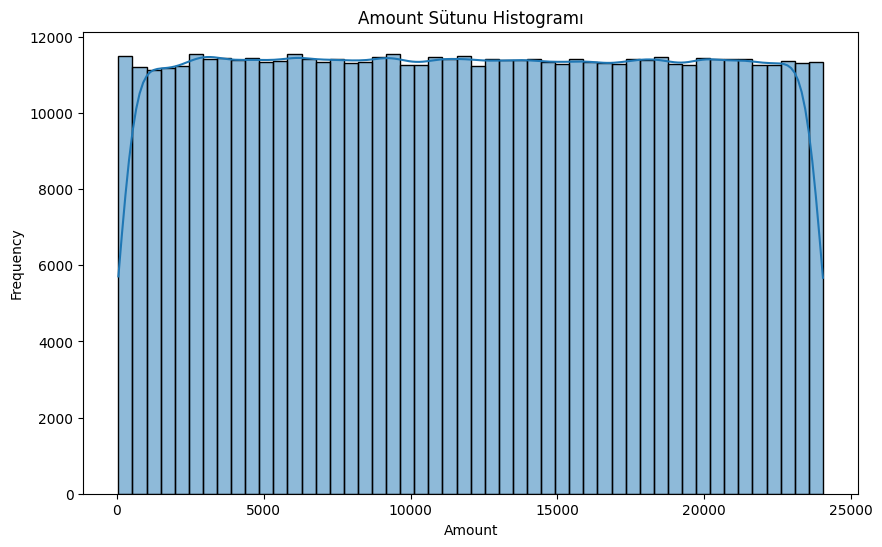

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Amount Sütunu Histogramı')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

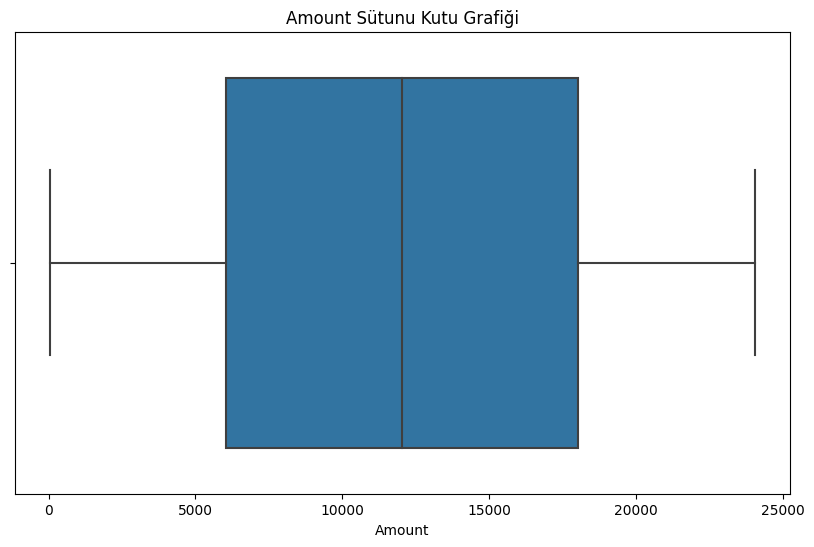

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Amount', data=df)
plt.title('Amount Sütunu Kutu Grafiği')
plt.xlabel('Amount')
plt.show()

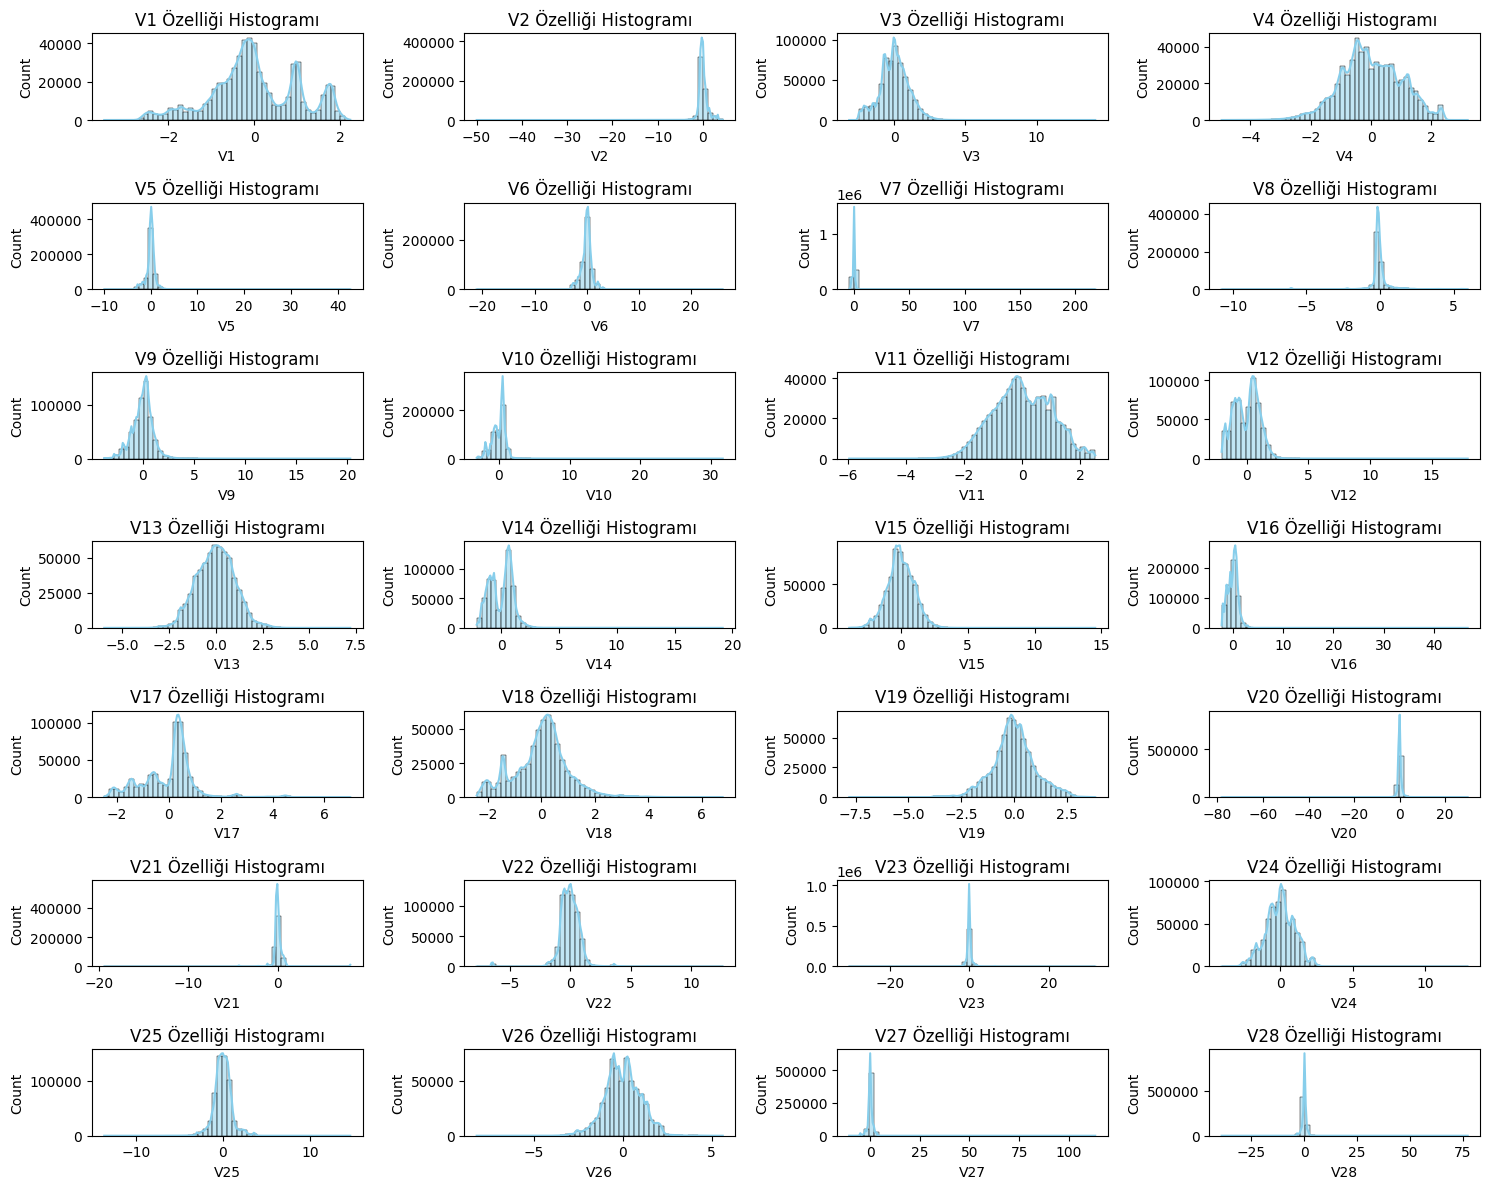

In [23]:
plt.figure(figsize=(15, 12))
for i in range(1, 29):
    plt.subplot(7, 4, i)
    sns.histplot(df[f'V{i}'], bins=50, kde=True, color='skyblue')
    plt.title(f'V{i} Özelliği Histogramı')

plt.tight_layout()
plt.show()

In [24]:
df = df.drop(["id"], axis=1)

In [25]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


## Model Eğitimi

In [26]:
X = df.drop("Class",axis=1)
y = df["Class"]

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,
                                                random_state=100)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Makine Öğrenmesi Algoritmaları

### Lojistik Regresyon

In [29]:
lg_model = LogisticRegression()

In [30]:
lg_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [31]:
lg_model.score(X_test_scaled,y_test)

0.9655805512176592

In [32]:
lg_model.score(X_train_scaled,y_train)

0.9648511508375697

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [34]:
y_pred=lg_model.predict(X_test_scaled)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9655805512176592

In [36]:
cm = confusion_matrix(y_test,y_pred)

In [37]:
cm

array([[69384,  1504],
       [ 3389, 67881]], dtype=int64)

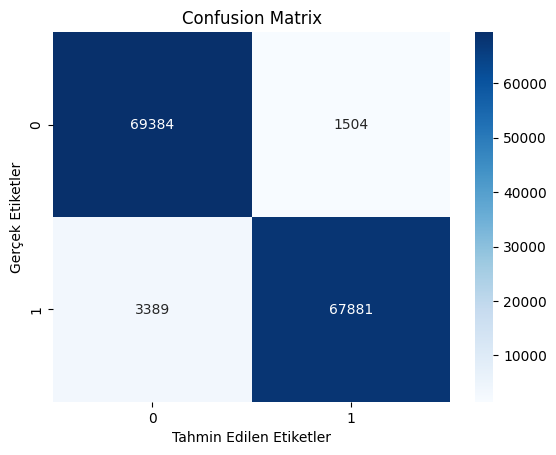

In [38]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Confusion Matrix')


plt.show()

In [39]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, lg_model.predict_proba(X_test_scaled)[:, 1])

print("\nAccuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))
print("AUC-ROC: {:.4f}".format(roc_auc))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.9656
Precision: 0.9783
Recall: 0.9524
F1-Score: 0.9652
AUC-ROC: 0.9936

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     70888
           1       0.98      0.95      0.97     71270

    accuracy                           0.97    142158
   macro avg       0.97      0.97      0.97    142158
weighted avg       0.97      0.97      0.97    142158



### Karar Ağacı (Decision Tree)

In [40]:
dt_model = DecisionTreeClassifier(criterion="entropy")

In [41]:
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy')

In [42]:
y_pred = dt_model.predict(X_test_scaled)

In [43]:
dt_model.score(X_test_scaled,y_test)

0.9982976687910635

In [44]:
dt_model.score(X_train_scaled,y_train)

1.0

In [45]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9982976687910635

In [46]:
cm = confusion_matrix(y_test,y_pred)

In [47]:
cm

array([[70712,   176],
       [   66, 71204]], dtype=int64)

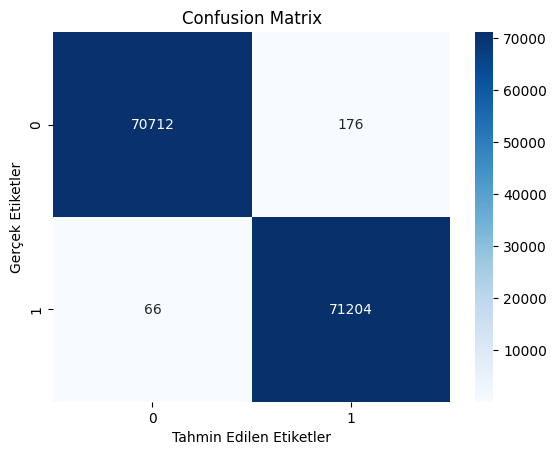

In [48]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Confusion Matrix')


plt.show()

In [49]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, lg_model.predict_proba(X_test_scaled)[:, 1])

print("\nAccuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))
print("AUC-ROC: {:.4f}".format(roc_auc))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9983
Precision: 0.9975
Recall: 0.9991
F1-Score: 0.9983
AUC-ROC: 0.9936

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70888
           1       1.00      1.00      1.00     71270

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



### K-En Yakın Komşu (KNN)

In [50]:
knn_model = KNeighborsClassifier()

In [51]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [52]:
y_pred_knn = knn_model.predict(X_test_scaled)

In [53]:
knn_model.score(X_test_scaled,y_test)

0.9977138113929571

In [54]:
knn_model.score(X_train_scaled,y_train)

0.998475867114371

In [55]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9982976687910635

In [56]:
cm = confusion_matrix(y_test,y_pred)

In [57]:
cm

array([[70712,   176],
       [   66, 71204]], dtype=int64)

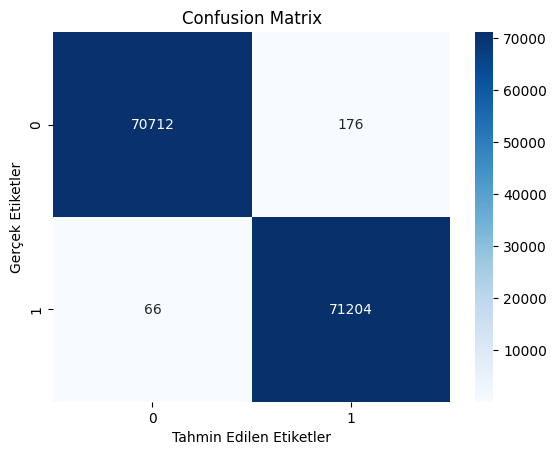

In [58]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Confusion Matrix')


plt.show()

In [59]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, lg_model.predict_proba(X_test_scaled)[:, 1])

print("\nAccuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))
print("AUC-ROC: {:.4f}".format(roc_auc))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9983
Precision: 0.9975
Recall: 0.9991
F1-Score: 0.9983
AUC-ROC: 0.9936

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70888
           1       1.00      1.00      1.00     71270

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



### Gaussian Naive Bayes

In [60]:
nb_model = GaussianNB()

In [61]:
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

In [62]:
y_pred_nb = nb_model.predict(X_test_scaled)

In [63]:
nb_model.score(X_test_scaled,y_test)

0.9203702922100762

In [64]:
nb_model.score(X_train_scaled,y_train)

0.9187613723761466

In [65]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9982976687910635

In [66]:
cm = confusion_matrix(y_test,y_pred)

In [67]:
cm

array([[70712,   176],
       [   66, 71204]], dtype=int64)

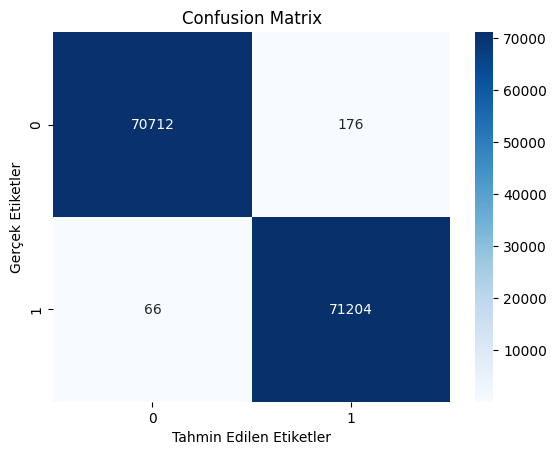

In [68]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Confusion Matrix')


plt.show()

In [69]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, lg_model.predict_proba(X_test_scaled)[:, 1])

print("\nAccuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))
print("AUC-ROC: {:.4f}".format(roc_auc))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9983
Precision: 0.9975
Recall: 0.9991
F1-Score: 0.9983
AUC-ROC: 0.9936

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70888
           1       1.00      1.00      1.00     71270

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



### Bernoulli Naive Bayes

In [70]:
bernoulli_nb_model = BernoulliNB()

In [71]:
bernoulli_nb_model.fit(X_train_scaled, y_train)

BernoulliNB()

In [72]:
y_pred_bernoulli_nb = bernoulli_nb_model.predict(X_test_scaled)

In [73]:
bernoulli_nb_model.score(X_test_scaled,y_test)

0.92447839727627

In [74]:
bernoulli_nb_model.score(X_train_scaled,y_train)

0.9230828753118611

In [75]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9982976687910635

In [76]:
cm = confusion_matrix(y_test,y_pred)

In [77]:
cm

array([[70712,   176],
       [   66, 71204]], dtype=int64)

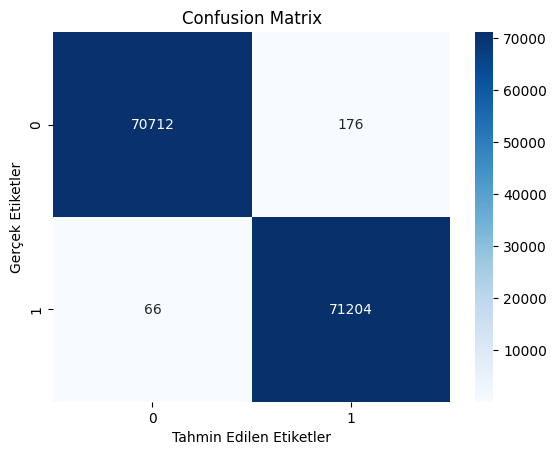

In [78]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Confusion Matrix')


plt.show()

In [79]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, lg_model.predict_proba(X_test_scaled)[:, 1])

print("\nAccuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))
print("AUC-ROC: {:.4f}".format(roc_auc))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9983
Precision: 0.9975
Recall: 0.9991
F1-Score: 0.9983
AUC-ROC: 0.9936

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70888
           1       1.00      1.00      1.00     71270

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



In [80]:
###SONUÇLAR
# LOJISTIK REGRESYON = 
"""
Accuracy: 0.9656
Precision: 0.9783
Recall: 0.9524
F1-Score: 0.9652
AUC-ROC: 0.9936
"""
# KARAR AĞACI = 
"""
Accuracy: 0.9983
Precision: 0.9975
Recall: 0.9990
F1-Score: 0.9983
AUC-ROC: 0.9936
"""
# K-En Yakın Komşu (KNN) =
"""
Accuracy: 0.9983
Precision: 0.9975
Recall: 0.9990
F1-Score: 0.9983
AUC-ROC: 0.9936
"""
# Gaussian Naive Bayes =
"""
Accuracy: 0.9983
Precision: 0.9975
Recall: 0.9990
F1-Score: 0.9983
AUC-ROC: 0.9936
"""
# Bernoulli Naive Bayes
"""
Accuracy: 0.9983
Precision: 0.9975
Recall: 0.9990
F1-Score: 0.9983
AUC-ROC: 0.9936
"""


'\nAccuracy: 0.9983\nPrecision: 0.9975\nRecall: 0.9990\nF1-Score: 0.9983\nAUC-ROC: 0.9936\n'